# Moldelowanie Układów Przepływowych @AGH (Lab 1, 29.X.2025 r.)
Sylwester Arabas (sylwester.arabas@agh.edu.pl)

## 1. analiza wymiarowa kodu Pythona przy użyciu [pint](https://pint.readthedocs.io/)

In [2]:
!pip install pint

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 306.8/306.8 kB 20.4 MB/s eta 0:00:00


In [3]:
!pip install open_atmos_jupyter_utils

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 37.3 MB/s eta 0:00:00


In [4]:
import pint
from scipy import constants as const
import matplotlib.pyplot as plt
import numpy as np
from open_atmos_jupyter_utils import show_plot

In [5]:
si = pint.UnitRegistry()




In [6]:
100 * si.m + 100 * si.cm

<Quantity(101.0, 'meter')>

In [7]:
result_m = 100 * si.m + 100 * si.cm

In [8]:
result_m.to_base_units()

<Quantity(101.0, 'meter')>

In [9]:
result_m.to(si.cm)

<Quantity(10100.0, 'centimeter')>

In [ ]:
def rho(p, T, R):
  return p / (R * T)
# pV = nRT
# M = m/n,    rho = m/V
# rho = m / nRT * p = M * p / RT

M_dryair = 28.966 * si.kg/ si.kmol
R = 8.314 * si.J / (si.kg * si.K)
Rd = const.R / M_dryair * si.J / si.K / si.mol
Rd = Rd.to_base_units() # trzeba to przekonwertować


print(Rd.to_base_units)

<bound method PlainQuantity.to_base_units of <Quantity(287.04214, 'meter ** 2 / second ** 2 / kelvin')>>


In [11]:
rho1 = rho(1013*si.hPa, 296*si.K, Rd)
print(rho1.to_base_units())

1.192263024877629 kilogram / meter ** 3


In [12]:
si.setup_matplotlib()

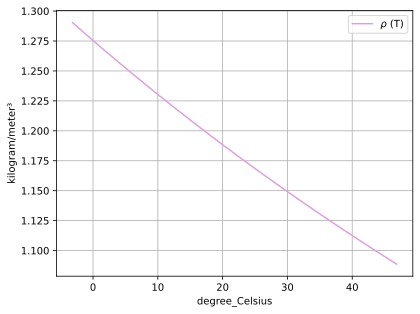

In [13]:

plt.plot(T := np.linspace(270,320,50)*si.K,
         rho(p=1000*si.hPa, T=T, R=Rd ).to_base_units(),
         label=r'$\rho$ (T)',
         color = 'plum')
plt.gca().xaxis.set_units(si.celsius)
plt.legend()
plt.grid(True)
show_plot('wgraficewektorowej.pdf')
plt.show()